In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_auc_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
data=pd.read_csv('HR.csv')
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [3]:
data.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [4]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [5]:
data.drop(columns=['EmployeeNumber'],inplace=True)

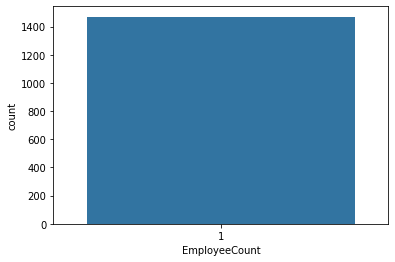

In [6]:
sns.countplot(data['EmployeeCount'])

In [7]:
# The employee count columns has only one value, hence this can be dropped
data.drop(columns=['EmployeeCount'], inplace=True)
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,4,80,0,17,3,2,9,6,0,8


In [8]:
# Dropping all columns with only one unique value
data=data.loc[:,data.apply(pd.Series.nunique) != 1]
data

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,...,3,1,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,...,4,4,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,...,3,2,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,...,3,3,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,...,3,3,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,...,3,1,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,...,4,2,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,...,3,4,0,17,3,2,9,6,0,8


In [9]:
data.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StockOptionLevel             int64
TotalWorkingYears            int64
TrainingTimesLastYear        int64
WorkLifeBalance              int64
YearsAtCompany               int64
YearsInCurrentRole  

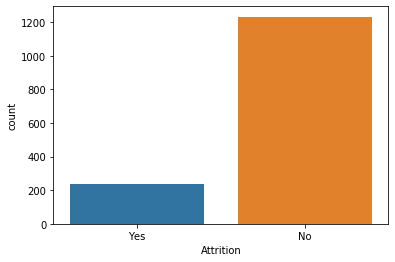

In [10]:
# Analyzing the employee attrition distribution
# The attrition level is almost 14%
sns.countplot(x="Attrition",data=data)
plt.show()

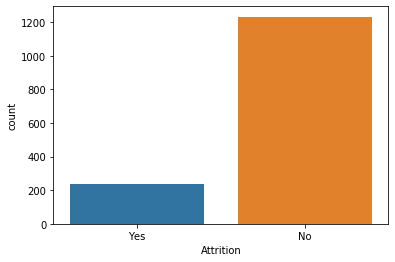

In [11]:
# Analyzing the employee attrition distribution
# The attrition level is almost 14%
sns.countplot(x='Attrition',data=data)
plt.show()

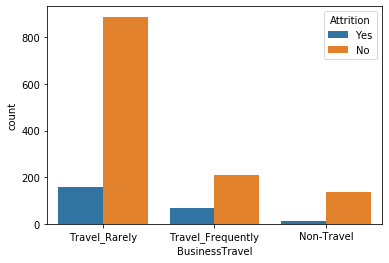

In [12]:
# Analyzing the employee attrition based on Business travel
# There is a higher percentage of attrition among employees who travel frequently
sns.countplot(x='BusinessTravel', hue='Attrition', data=data)
plt.show()

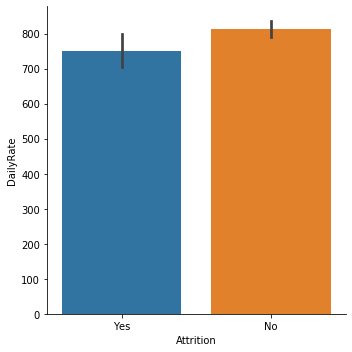

In [13]:
# Analyzing the employee attrition based on daily rate
# There seems to be slight difference in attrition levels for employees with higher daily rates as compared to low daily rates
sns.catplot(x='Attrition', y='DailyRate', kind='bar', data=data)
plt.show()

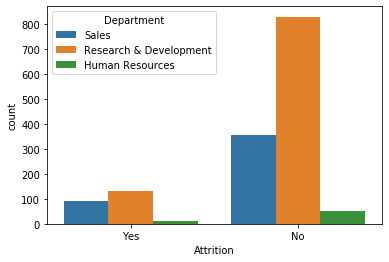

In [14]:
# Analyzing the employee attrition based on department
# R&D seems to have a higher attrition level as compared to other departments
sns.countplot(x='Attrition', hue='Department', data=data)
plt.show()

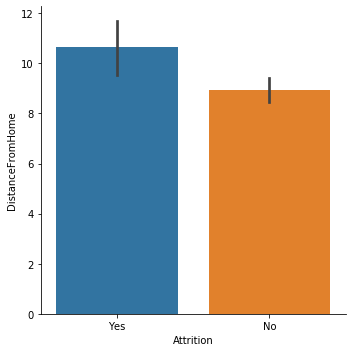

In [15]:
# Analyzing the employee attrition based on the distance from home
# There is a higher level of attrition in employees living far from the office
sns.catplot(x='Attrition', y='DistanceFromHome', kind='bar', data=data)
plt.show()

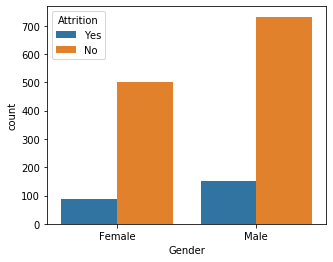

In [16]:
# Analyzing the employee attrition based on the gender
# There is a higher level of attrition among male employees
plt.figure(figsize=(5,4))
sns.countplot(x='Gender',hue='Attrition', data=data)
plt.show()

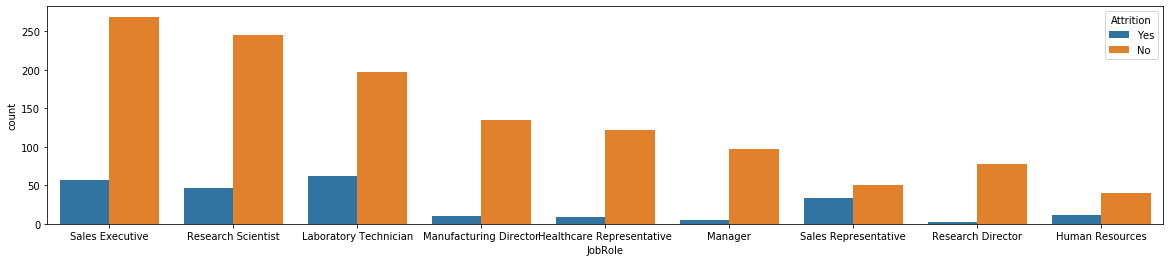

In [17]:
# Analyzing the employee attrition based on the job role
# There is a higher level of attrition among employees working as laboratory technician
plt.figure(figsize=(20,4))
sns.countplot(x='JobRole',hue='Attrition', data=data)
plt.show()

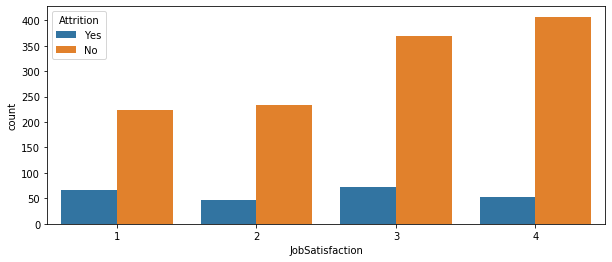

In [18]:
# Analyzing the employee attrition based on the job satisfaction
# The attrition level decreases with increase in job satisfaction
plt.figure(figsize=(10,4))
sns.countplot(x='JobSatisfaction',hue='Attrition', data=data)
plt.show()

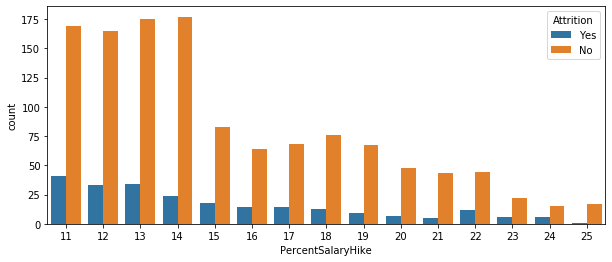

In [19]:
# Analyzing the employee attrition based on the Percent Salary Hike 
# The attrition level decreases with increase in Percent Salary Hike
plt.figure(figsize=(10,4))
sns.countplot(x='PercentSalaryHike',hue='Attrition', data=data)
plt.show()

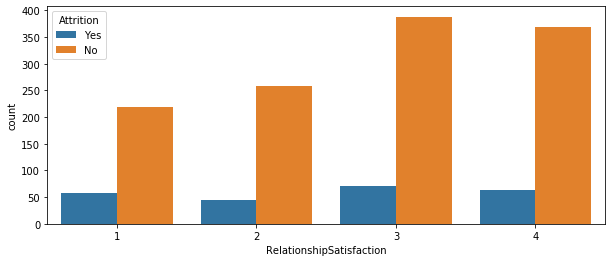

In [20]:
# Analyzing the employee attrition based on the RelationshipSatisfaction
# The attrition level decreases with increase in RelationshipSatisfaction
plt.figure(figsize=(10,4))
sns.countplot(x='RelationshipSatisfaction',hue='Attrition', data=data)
plt.show()

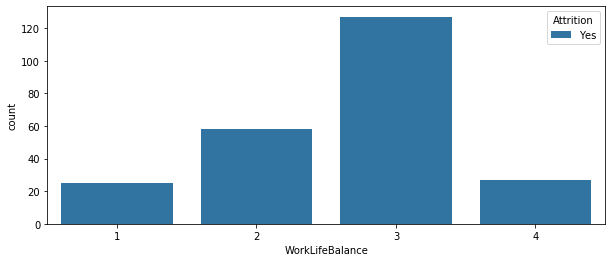

In [21]:
# Analyzing the employee attrition based on the Work Life Balance
# The work life balance factor do not seems to influence the attrition level in the company 
plt.figure(figsize=(10,4))
sns.countplot(x='WorkLifeBalance',hue='Attrition', data=data.loc[data['Attrition']=='Yes'])
plt.show()

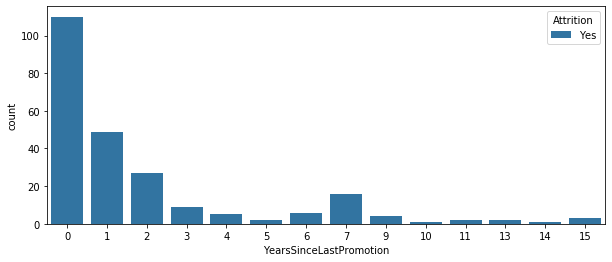

In [22]:
# Analyzing the employee attrition based on the Work Life Balance
# The majority of employees leave the firm within two years of their promotion. Hence, promotion is not the factor responsible for attrition in the company
plt.figure(figsize=(10,4))
sns.countplot(x='YearsSinceLastPromotion',hue='Attrition', data=data.loc[data['Attrition']=='Yes'])
plt.show()

In [23]:
corr=data.corr()
corr

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


In [24]:
data.describe()

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,...,3.153741,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,...,0.360824,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,...,3.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,...,3.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,...,3.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,...,3.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,...,4.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [25]:
data.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome            0.958118
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    1.025401
JobSatisfaction            -0.329672
MonthlyIncome               1.369817
MonthlyRate                 0.018578
NumCompaniesWorked          1.026471
PercentSalaryHike           0.821128
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.968980
TotalWorkingYears           1.117172
TrainingTimesLastYear       0.553124
WorkLifeBalance            -0.552480
YearsAtCompany              1.764529
YearsInCurrentRole          0.917363
YearsSinceLastPromotion     1.984290
YearsWithCurrManager        0.833451
dtype: float64

In [26]:
x=data.drop(columns=['Attrition'])
y=data['Attrition']

In [27]:
# Removing skewness from data
for index in x.skew().index:
    if x.skew().loc[index]>0.5:
        x[index]=np.log1p(x[index])
    if x.skew().loc[index]<-0.5:
        x[index]=np.square(x[index])

In [28]:
x.skew()

Age                         0.413286
DailyRate                  -0.003519
DistanceFromHome           -0.029121
Education                  -0.289681
EnvironmentSatisfaction    -0.321654
HourlyRate                 -0.032311
JobInvolvement             -0.498419
JobLevel                    0.448133
JobSatisfaction            -0.329672
MonthlyIncome               0.286448
MonthlyRate                 0.018578
NumCompaniesWorked          0.092896
PercentSalaryHike           0.513543
PerformanceRating           1.921883
RelationshipSatisfaction   -0.302828
StockOptionLevel            0.271963
TotalWorkingYears           0.322355
TrainingTimesLastYear       0.492375
WorkLifeBalance             0.301318
YearsAtCompany             -0.207708
YearsInCurrentRole         -0.383498
YearsSinceLastPromotion     0.718805
YearsWithCurrManager       -0.357686
dtype: float64

In [29]:
# There are categorical variables in the dataset
x=pd.get_dummies(x,drop_first=True)
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,41,1102,0.693147,2,2,94,3,1.098612,4,8.698514,...,0,0,0,0,0,1,0,0,1,1
1,49,279,2.197225,1,3,61,2,1.098612,2,8.543056,...,0,0,0,0,1,0,0,1,0,0
2,37,1373,1.098612,2,4,92,2,0.693147,3,7.645398,...,1,0,0,0,0,0,0,0,1,1
3,33,1392,1.386294,4,4,56,3,0.693147,3,7.975908,...,0,0,0,0,1,0,0,1,0,1
4,27,591,1.098612,1,1,40,3,0.693147,2,8.151622,...,1,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,3.178054,2,3,41,4,1.098612,4,7.852439,...,1,0,0,0,0,0,0,1,0,0
1466,39,613,1.945910,1,4,42,2,1.386294,1,9.209540,...,0,0,0,0,0,0,0,1,0,0
1467,27,155,1.609438,3,2,87,4,1.098612,2,8.723069,...,0,0,1,0,0,0,0,1,0,1
1468,49,1023,1.098612,3,4,63,2,1.098612,2,8.592486,...,0,0,0,0,0,1,0,1,0,0


In [30]:
y

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
1465     No
1466     No
1467     No
1468     No
1469     No
Name: Attrition, Length: 1470, dtype: object

In [31]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
sc.fit(x)
a=sc.transform(x)
x=pd.DataFrame(a,columns=x.columns)
x

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
0,0.446350,0.742527,-1.505350,-0.891688,-0.660531,1.383138,0.379672,0.112298,1.153254,0.219493,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,-0.918921,1.458650,1.591746
1,1.322365,-1.297775,0.252002,-1.868426,0.254625,-0.240677,-1.026167,0.112298,-0.660853,-0.014600,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
2,0.008343,1.414363,-1.031607,-0.891688,1.169781,1.284725,-1.026167,-1.094180,0.246200,-1.366318,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,-0.918921,1.458650,1.591746
3,-0.429664,1.461466,-0.695482,1.061787,1.169781,-0.486709,0.379672,-1.094180,0.246200,-0.868626,...,-0.462464,-0.273059,-0.330808,-0.239904,2.008543,-0.533821,-0.244625,1.088232,-0.685565,1.591746
4,-1.086676,-0.524295,-1.031607,-1.868426,-1.575686,-1.274014,0.379672,-1.094180,-0.660853,-0.604032,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,-0.101159,0.202082,1.397995,-0.891688,0.254625,-1.224807,1.785511,0.112298,1.153254,-1.054549,...,2.162331,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
1466,0.227347,-0.469754,-0.041631,-1.868426,1.169781,-1.175601,-1.026167,0.968307,-1.567907,0.989009,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,-0.628241
1467,-1.086676,-1.605183,-0.434763,0.085049,-0.660531,1.038693,1.785511,0.112298,-0.660853,0.256468,...,-0.462464,-0.273059,3.022901,-0.239904,-0.497873,-0.533821,-0.244625,1.088232,-0.685565,1.591746
1468,1.322365,0.546677,-1.031607,0.085049,1.169781,-0.142264,-1.026167,0.112298,-0.660853,0.059833,...,-0.462464,-0.273059,-0.330808,-0.239904,-0.497873,1.873287,-0.244625,1.088232,-0.685565,-0.628241


In [32]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
le.fit(y)
y=le.transform(y)
y

array([1, 0, 1, ..., 0, 0, 0])

In [33]:
from imblearn import under_sampling, over_sampling
from imblearn.over_sampling import SMOTE
from sklearn.metrics import roc_auc_score
def maxrocaucscore(cm,x,y):
    max_roc_auc=0
    for r_state in range(0,150):
        x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = r_state,test_size=0.20, stratify=y)
        cm.fit(x_train,y_train)
        y_pred=cm.predict(x_test)
        fsc=roc_auc_score(y_test,y_pred)
        if fsc>max_roc_auc:
            max_roc_auc=fsc
            rs=r_state
    print('Maximum roc_auc score is :', max_roc_auc, 'at random state :', rs)

In [34]:
# Using Logistic regression
Logreg=LogisticRegression()
C = [0.001,0.01,0.1,1,10,100,1000]
penalty = ['l1', 'l2']
hyperparametersLogreg=dict(C=C, penalty=penalty)
gridlr=GridSearchCV(Logreg, hyperparametersLogreg, cv=5, scoring='roc_auc')
gridlr.fit(x,y)
print(gridlr.best_params_)

{'C': 0.1, 'penalty': 'l2'}


In [35]:
from sklearn.linear_model import LogisticRegression
lr=LogisticRegression(C=0.1, penalty='l2')
maxrocaucscore(lr,x,y)

Maximum roc_auc score is : 0.7750882935653373 at random state : 80


In [36]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for LogisticRegression score is:', cross_val_score(lr,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(lr,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for LogisticRegression score is: 0.8443071485047696
Standard deviation in roc_auc score is:  0.016167993075804337


In [37]:
# Using Decision Tree Classifier
dtc=DecisionTreeClassifier()
hyperparametersdtc={'criterion':['gini','entropy'],'max_depth':range(1,10)}
griddtc=GridSearchCV(dtc, hyperparametersdtc, cv=5, scoring='roc_auc')
griddtc.fit(x,y)
print(griddtc.best_params_)

{'criterion': 'entropy', 'max_depth': 3}


In [38]:
from sklearn.tree import DecisionTreeClassifier
dtc=DecisionTreeClassifier(criterion='entropy', max_depth=3)
maxrocaucscore(dtc,x,y)

Maximum roc_auc score is : 0.6677147041088811 at random state : 40


In [39]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Decision Tree Classifier is:', cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(dtc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Decision Tree Classifier is: 0.7220569293028187
Standard deviation in roc_auc score is:  0.043164996076519115


In [41]:
# Using SVC
from sklearn.svm import SVC
svc=SVC()
hyperparameterssvc = {'C': [0.001, 0.01, 0.1, 1, 10], 'kernel': ['rbf','poly','linear']}
gridsvc=GridSearchCV(svc, hyperparameterssvc, cv=5, scoring='roc_auc')
gridsvc.fit(x,y)
print(gridsvc.best_params_)

{'C': 0.1, 'kernel': 'linear'}


In [42]:
from sklearn.svm import SVC
svc=SVC(C=0.1, kernel='linear')
maxrocaucscore(svc,x,y)

Maximum roc_auc score is : 0.8004134723059695 at random state : 80


In [43]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for SVC is:', cross_val_score(svc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(svc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for SVC is: 0.8421730634418069
Standard deviation in roc_auc score is:  0.014905631981422515


In [44]:
# Using KNN
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn=KNeighborsClassifier()
parametersknn={'n_neighbors':[5,6,7,8,9,10]}
knn1 = GridSearchCV(knn, parametersknn, cv=5,scoring="roc_auc")
knn1.fit(x,y)
knn1.best_params_

{'n_neighbors': 9}

In [45]:
knn=KNeighborsClassifier(n_neighbors=9)
maxrocaucscore(knn,x,y)

Maximum roc_auc score is : 0.593720389353088 at random state : 79


In [46]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for KNN is:', cross_val_score(knn,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(knn,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for KNN is: 0.7184843664538377
Standard deviation in roc_auc score is:  0.03626705476483891


In [47]:
# Using RandomForestClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier()
parametersrfc={'n_estimators':[100,150,200,250,300]}
rfc1 = GridSearchCV(rfc, parametersrfc, cv=5,scoring="roc_auc")
rfc1.fit(x,y)
rfc1.best_params_

{'n_estimators': 150}

In [48]:
rfc=RandomForestClassifier(n_estimators=150)
maxrocaucscore(rfc,x,y)

Maximum roc_auc score is : 0.6342492893444742 at random state : 119


In [49]:
# Using cross validation score to avoid underfitting and overfitting of model
print('Mean cross validation score for Random Forest Classifier is:', cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").mean())
print("Standard deviation in roc_auc score is: ",cross_val_score(rfc,x,y,cv=5,scoring="roc_auc").std())

Mean cross validation score for Random Forest Classifier is: 0.809037375158186
Standard deviation in roc_auc score is:  0.02704019648842783


In [54]:
# Among all the models, SVC is the best performing model
from sklearn.svm import SVC
x_train,x_test,y_train,y_test=train_test_split(x, y,random_state = 80,test_size=0.20,stratify=y)
svc=SVC(C=0.1, kernel='linear')
svc.fit(x_train,y_train)
y_pred=svc.predict(x_test)
print('classification_report \n', classification_report(y_test,y_pred))
print('Confusion matrix \n', confusion_matrix(y_test,y_pred))
print('AUC ROC Score: ', roc_auc_score(y_test,y_pred))

classification_report 
               precision    recall  f1-score   support

           0       0.93      0.98      0.96       247
           1       0.88      0.62      0.73        47

    accuracy                           0.93       294
   macro avg       0.90      0.80      0.84       294
weighted avg       0.92      0.93      0.92       294

Confusion matrix 
 [[243   4]
 [ 18  29]]
AUC ROC Score:  0.8004134723059695


In [55]:
# Saving the decision tree model
from sklearn.externals import joblib 
joblib.dump(svc, 'HRAnalytics_svc.pkl')

['HRAnalytics_svc.pkl']